In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [44]:
df = pd.read_csv('sample_data/winequality-red.csv')

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [49]:
df['is_duplicated'] = df.duplicated()

In [50]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_duplicated
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,False
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,False
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [74]:
df['is_duplicated'].value_counts()
# as we can see in here there are so many duplication in here so we have to delete the duplication data from dataset

False    1359
True      240
Name: is_duplicated, dtype: int64

In [76]:
true_index = df.index[df['is_duplicated']]

In [77]:
df.drop(index = true_index, axis = 0, inplace = True)

In [79]:
df.shape
# so know we've had the clean data

(1359, 13)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


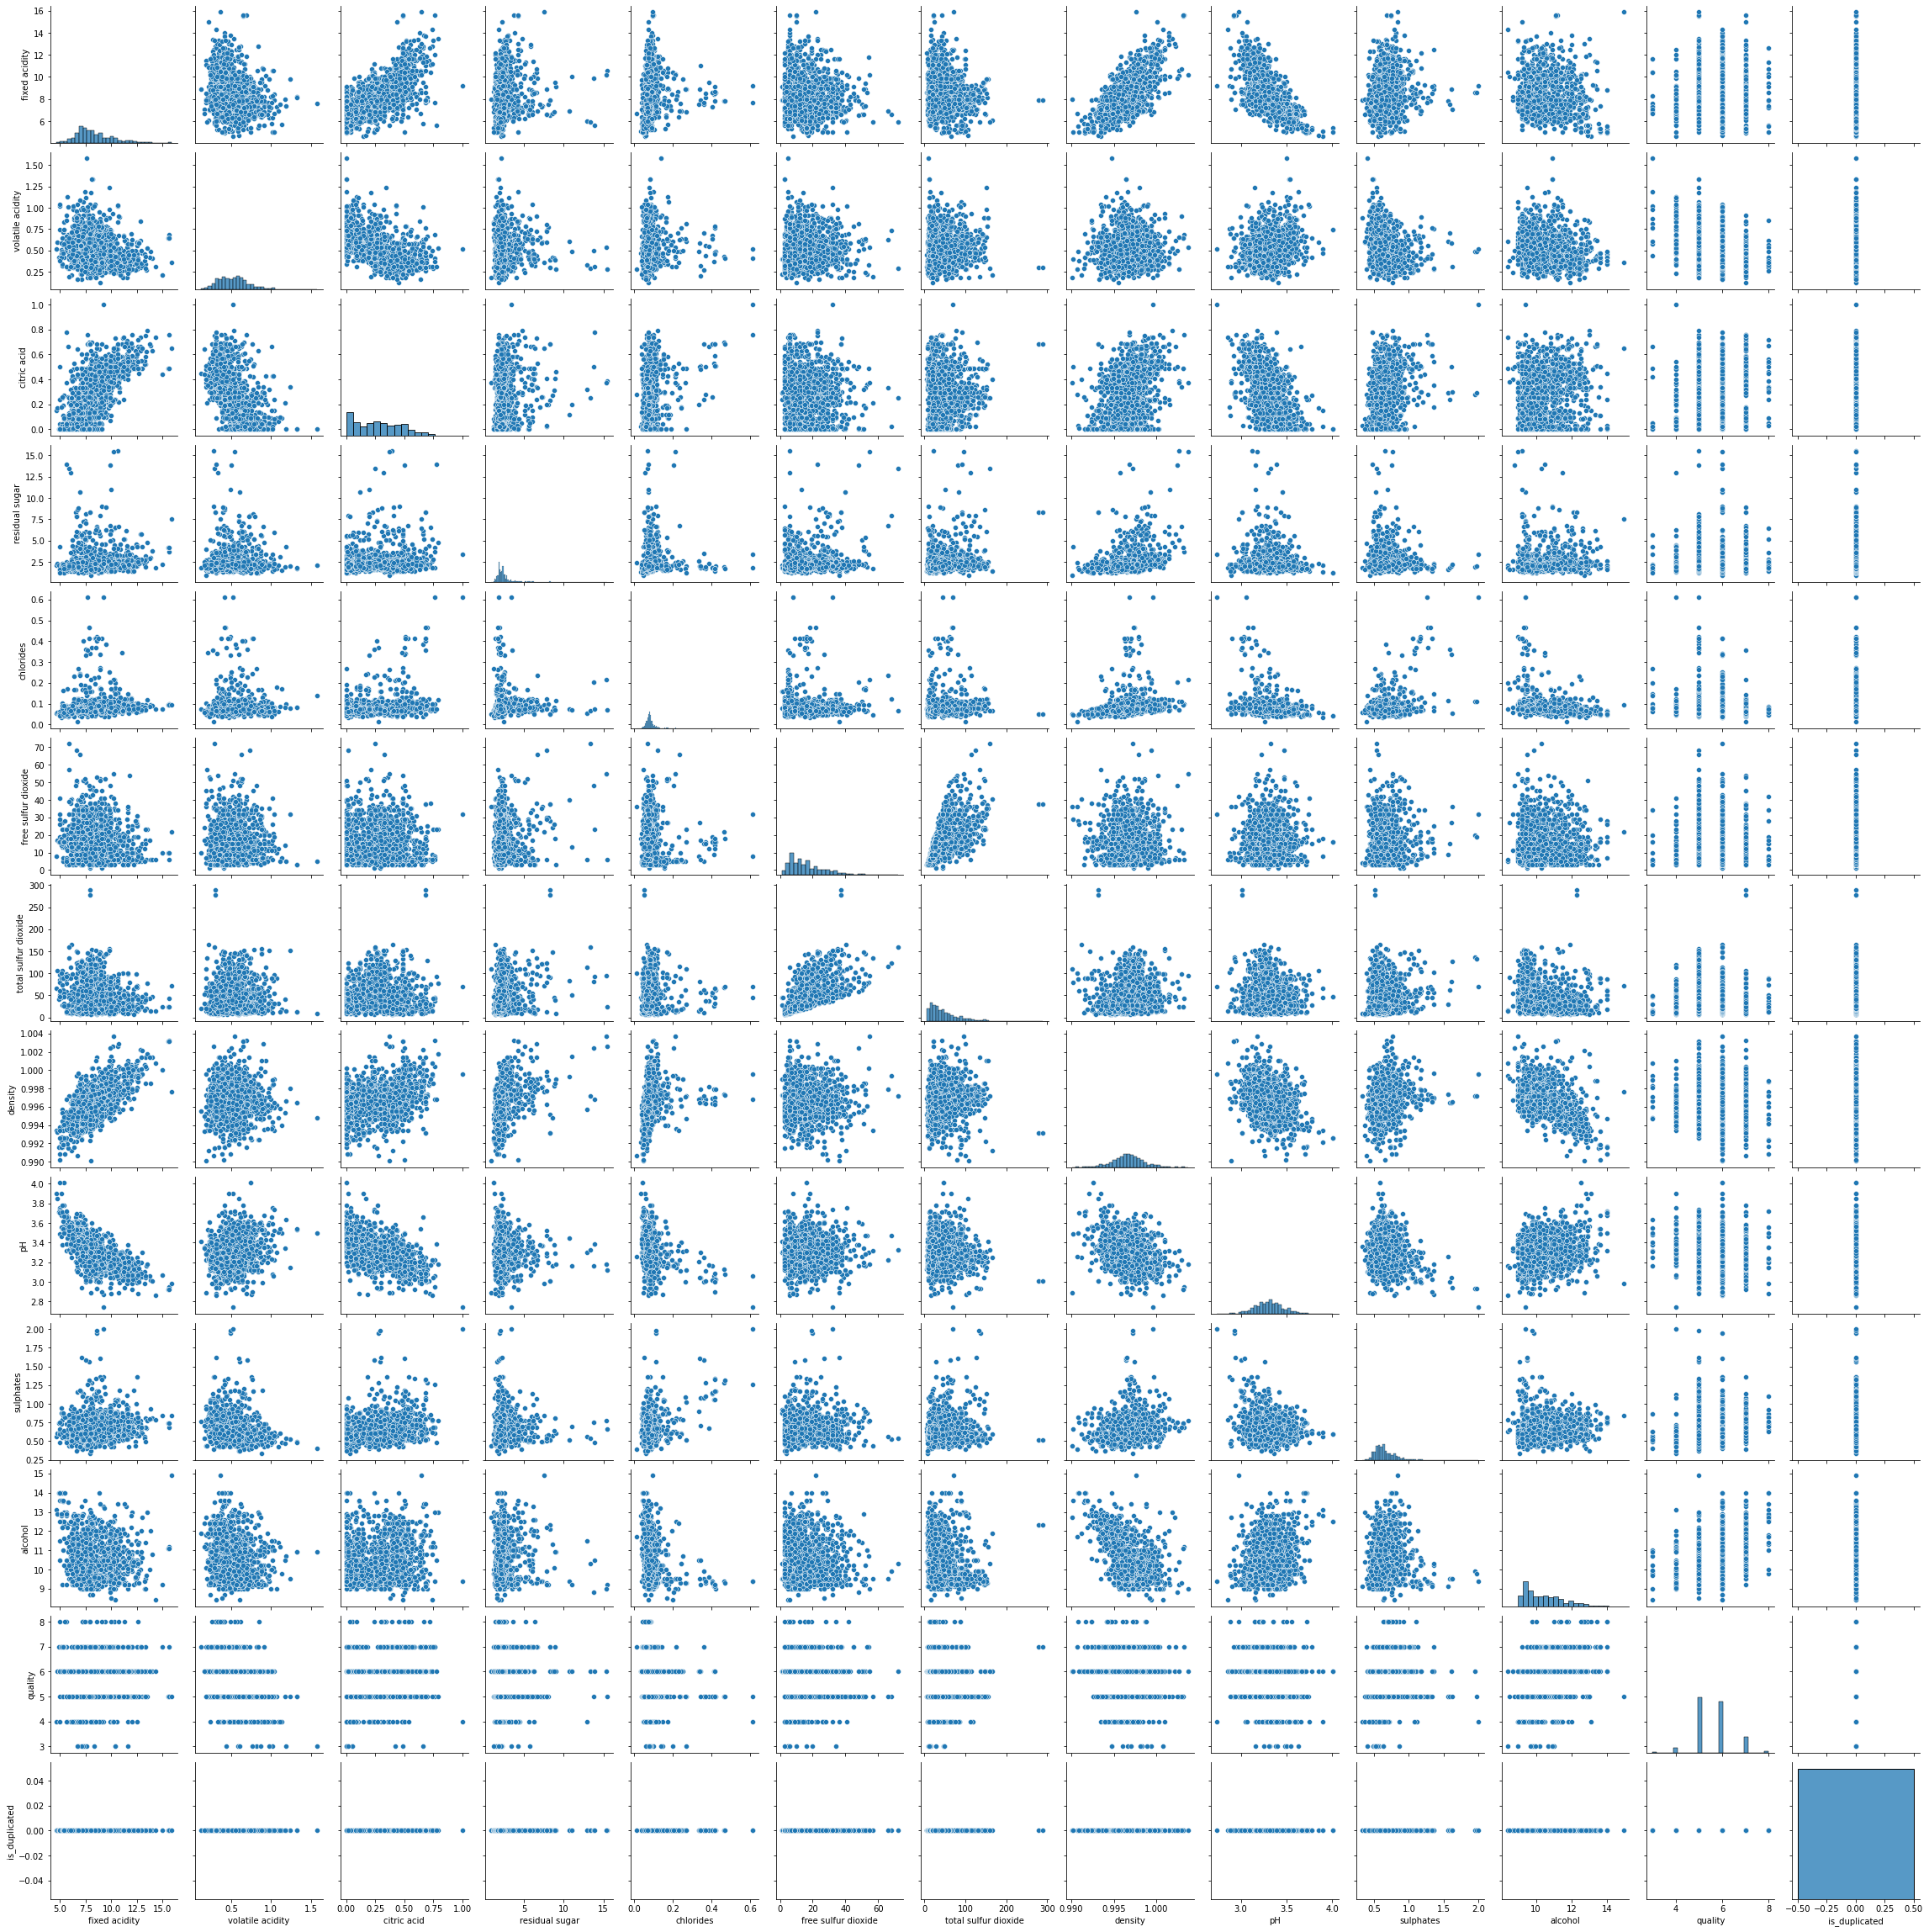

In [80]:
# now let's do the visualization
sns.pairplot(data = df)

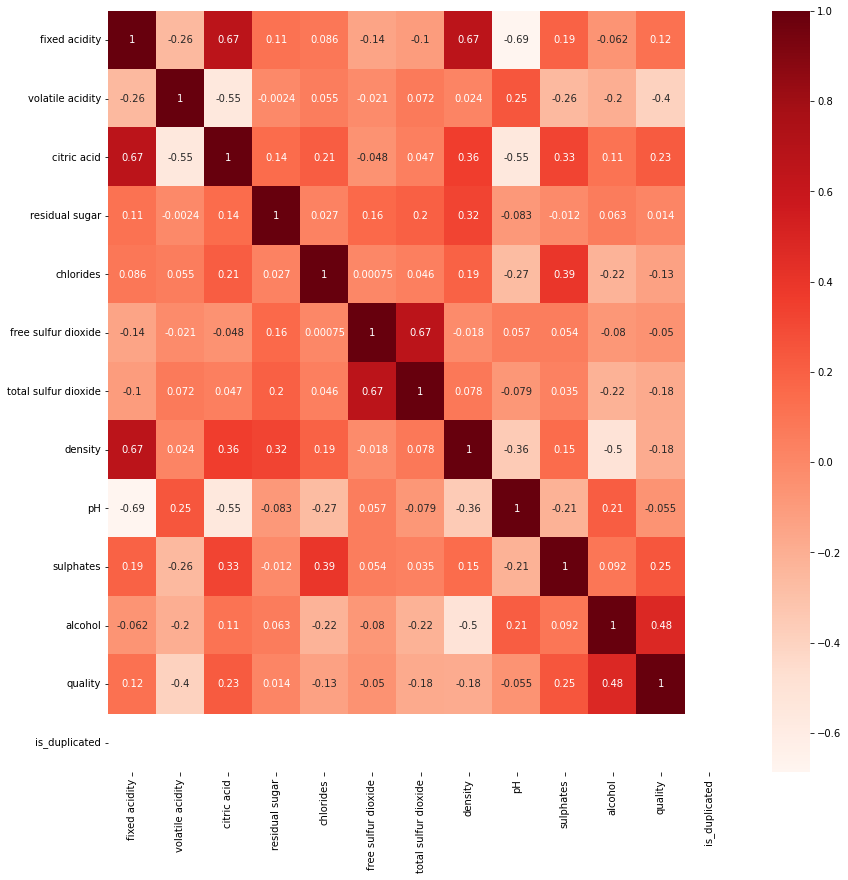

In [92]:
plt.figure(figsize=(14,14))
plt.title("Correlation Table")
sns.heatmap(df.corr(), cmap = 'Reds', cbar = True, annot = True)

Text(0.5, 1.0, 'alcohol vs pH')

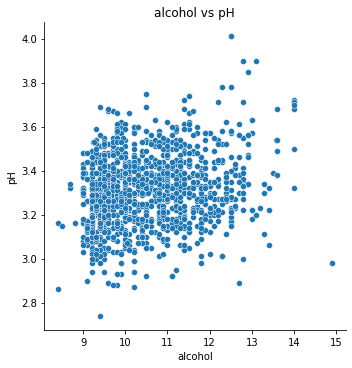

In [96]:
sns.relplot(data = df, x = "alcohol", y = "pH")
plt.title("alcohol vs pH")

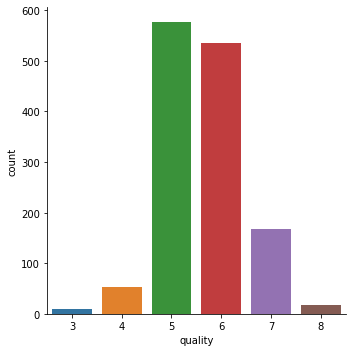

In [101]:
sns.catplot(data = df, x = 'quality', kind = 'count')

Text(0.5, 1.0, 'total sulfur dioxide vs free sulfur dioxide scatter plot')

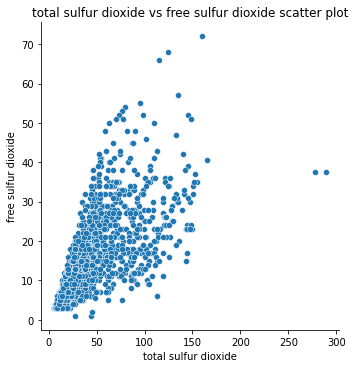

In [103]:
sns.relplot(data = df, x="total sulfur dioxide", y = "free sulfur dioxide")
plt.title("total sulfur dioxide vs free sulfur dioxide scatter plot")

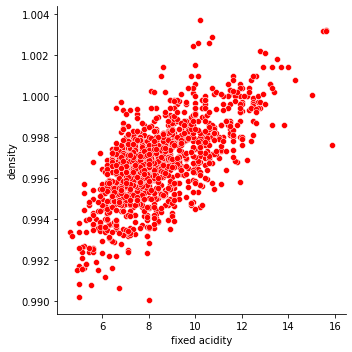

In [105]:
sns.relplot(data = df, x ="fixed acidity", y = "density", color = 'red')
# between density and fixed acidiry also has the close relation

In [110]:
# now we are going to do the data selection
x = df.drop(columns = ['is_duplicated','quality'], axis = 1)
y = df['quality']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10 )

In [132]:
# now we will process the data using rfc
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
681,8.0,0.45,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2
248,7.7,0.53,0.06,1.7,0.074,9.0,39.0,0.99615,3.35,0.48,9.8
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1
1100,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1354,7.2,0.58,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8
607,8.8,0.48,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5
1356,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.99464,3.36,0.44,10.1


In [133]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_predict =rfc.predict(x_test)
y_predict

array([7, 6, 6, 5, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       7, 5, 6, 5, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 5, 6, 7, 5, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 3, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 7, 5])

In [135]:
accuracy = accuracy_score(y_predict, y_test)
print("The ML accuracy is {}".format(accuracy))

The ML accuracy is 0.6102941176470589


In [155]:
cfm = confusion_matrix(y_predict, y_test)

In [156]:
cfm

array([[ 0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  9, 51, 24,  2],
       [ 0,  2, 11, 23,  4],
       [ 0,  0,  0,  0,  9]])

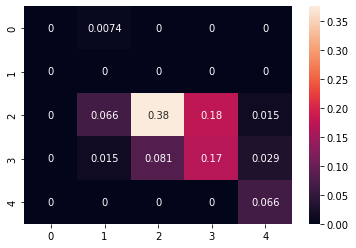

In [157]:
sns.heatmap(cfm/np.sum(cfm), annot = True)